In [1]:
from pydeseq2.ds import DeseqStats
!pip install anndata

In [2]:
import anndata as ad
import pandas as pd

In [88]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [4]:
!pip install pydeseq2

In [89]:
adata = ppmi_ad[(ppmi_ad.obs["Gender"] == "Male") &
                (ppmi_ad.obs["Visit"] == "BL") &
                (ppmi_ad.obs["Diagnosis"].isin(["PD", "Control"]))]

In [90]:
cell_props = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/cibersortx_metadata_df.csv", index_col=0)

In [91]:
filtered_cell_meta = cell_props.loc[adata.obs["Sample"],:]

In [92]:
filtered_cell_meta.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Diagnosis,Visit,Gender,Genetic_Group,Age_Group
Mixture,,,,,,,,,,,,,,,,,,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.010364,0.008340,0.0,0.000000,0.176513,0.058604,0.013397,0,0.0,0.000000,...,0.000000,0.359522,0,0.900986,0.518223,PD,BL,Male,NaN,70-80
3435.BL.PP0015.8880.5104.SL.0011,0.010684,0.002010,0.0,0.010238,0.121306,0.156061,0.009448,0,0.0,0.000000,...,0.000000,0.322555,0,0.887439,0.545949,PD,BL,Male,SRDC,50-70
3479.BL.PP0021.2283.5104.SL.0021,0.007398,0.003453,0.0,0.000000,0.143299,0.138561,0.036220,0,0.0,0.020478,...,0.005641,0.271101,0,0.860936,0.593208,Control,BL,Male,NaN,50-70
4110.BL.0003150414.5104.SL.0026,0.023685,0.000000,0.0,0.000000,0.205892,0.031398,0.009099,0,0.0,0.000000,...,0.012469,0.287567,0,0.867439,0.579053,PD,BL,Male,NaN,70-80
3174.BL.PP0015.7985.5104.SL.0027,0.002609,0.006557,0.0,0.000000,0.218058,0.128217,0.025315,0,0.0,0.000000,...,0.000000,0.269151,0,0.874726,0.579109,PD,BL,Male,SRDC,50-70


In [93]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.columns.isin(["Gender", "Diagnosis", "Neutrophils", "Monocytes"])] #~filtered_cell_meta.columns.isin(["P-value", "Correlation", "RMSE", "Visit", "Gender", "Genetic_Group", "Age_Group"])]

In [94]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.sum(axis=0) != 0]

In [95]:
filtered_cell_meta.columns = (filtered_cell_meta.columns
                              .str.replace(" ", "_")
                              .str.replace("-", "_")
                              .str.replace(r"\(|\)", "", regex=True))

In [96]:
design_factors = filtered_cell_meta.columns.values.tolist()

In [97]:
design_factors

['Monocytes', 'Neutrophils', 'Diagnosis', 'Gender']

In [98]:
filtered_cell_meta.head()

,Monocytes,Neutrophils,Diagnosis,Gender
Mixture,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.261202,0.359522,PD,Male
3435.BL.PP0015.8880.5104.SL.0011,0.265266,0.322555,PD,Male
3479.BL.PP0021.2283.5104.SL.0021,0.272197,0.271101,Control,Male
4110.BL.0003150414.5104.SL.0026,0.275920,0.287567,PD,Male
3174.BL.PP0015.7985.5104.SL.0027,0.248029,0.269151,PD,Male


In [102]:
df = adata.to_df()
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000284332.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
3471.BL.PP0015.6713.5104.SL.0007,0,97,8,0,0,0,0,0,2,124,...,0,9,0,1,0,0,7,1,0,0
3435.BL.PP0015.8880.5104.SL.0011,15,209,6,8,0,6,6,19,7,176,...,2,12,7,0,6,2,32,17,0,0
3479.BL.PP0021.2283.5104.SL.0021,3,107,3,0,0,0,0,0,0,35,...,1,0,6,0,0,0,28,0,0,0
4110.BL.0003150414.5104.SL.0026,0,90,3,0,0,0,0,0,1,75,...,0,0,3,0,0,0,8,0,0,0
3174.BL.PP0015.7985.5104.SL.0027,7,239,5,0,0,0,0,0,0,110,...,0,0,0,0,0,2,9,0,0,0


In [103]:
from pydeseq2.ds import DeseqDataSet
dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_6024/2293354848.py:2: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")


In [104]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.24 seconds.

Fitting dispersions...
... done in 66.21 seconds.

Fitting dispersion trend curve...
... done in 2.08 seconds.

Fitting MAP dispersions...
... done in 98.59 seconds.

Fitting LFCs...
... done in 52.58 seconds.

Calculating cook's distance...
... done in 2.98 seconds.

Replacing 0 outlier genes.



In [105]:
contrast = ("Diagnosis", "PD", "Control")
deseq_stats = DeseqStats(dds, contrast=contrast)
deseq_stats.summary()
deg_results = deseq_stats.results_df
deg_results.head()

Running Wald tests...
... done in 11.71 seconds.



Log2 fold change & Wald test p-value: Diagnosis PD vs Control
                     baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000223972.5    7.767234       -0.174383  0.154397 -1.129449  0.258709   
ENSG00000227232.5  101.627474       -0.187411  0.068399 -2.739979  0.006144   
ENSG00000278267.1   12.701854       -0.110926  0.107244 -1.034326  0.300984   
ENSG00000243485.5    2.192026       -0.205603  0.383135 -0.536634  0.591520   
ENSG00000284332.1    0.000000             NaN       NaN       NaN       NaN   
...                       ...             ...       ...       ...       ...   
ENSG00000276017.1    1.384704       -0.250991  0.481830 -0.520912  0.602428   
ENSG00000278817.1    8.469801       -0.058145  0.098050 -0.593020  0.553168   
ENSG00000277196.4    2.638052       -0.239666  0.365914 -0.654979  0.512481   
ENSG00000278625.1    0.147302       -0.119328  0.684291 -0.174382  0.861566   
ENSG00000277374.1    0.026067       -0.050209  2.570233 -0.019535  0.

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000223972.5,7.767234,-0.174383,0.154397,-1.129449,0.258709,0.695065
ENSG00000227232.5,101.627474,-0.187411,0.068399,-2.739979,0.006144,0.695065
ENSG00000278267.1,12.701854,-0.110926,0.107244,-1.034326,0.300984,0.695065
ENSG00000243485.5,2.192026,-0.205603,0.383135,-0.536634,0.591520,0.796607
ENSG00000284332.1,0.000000,NaN,NaN,NaN,NaN,NaN


In [106]:
deg_results['abs_log2FoldChange'] = deg_results['log2FoldChange'].abs()
deg_results['padj'] = deg_results['padj'].fillna(1)
deg_results.sort_values(by=["abs_log2FoldChange", "padj"], ascending=[False, True])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000211912.1,0.789986,-43.280851,5.893079,-7.344353,2.067575e-13,1.000000e+00,43.280851
ENSG00000273730.1,3.360346,-5.068116,0.587630,-8.624678,6.427350e-18,1.454606e-13,5.068116
ENSG00000243366.3,55.559840,3.117541,0.358171,8.704061,3.202155e-18,1.449392e-13,3.117541
ENSG00000280800.1,42.731252,-2.424800,0.421508,-5.752682,8.783873e-09,9.939611e-05,2.424800
ENSG00000229807.11,87.686639,-2.137447,0.323361,-6.610090,3.840872e-11,5.794980e-07,2.137447
...,...,...,...,...,...,...,...
ENSG00000276351.1,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
ENSG00000275661.1,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
ENSG00000277927.1,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
ENSG00000276872.1,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN


In [107]:
deg_results_sign = deg_results[(deg_results['abs_log2FoldChange'] >= 0.5) & (deg_results['padj'] <= 0.05)]
deg_results_sign

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000228549.3,965.811005,1.936878,0.398154,4.864649,1.146599e-06,4.716397e-03,1.936878
ENSG00000207005.1,155.049616,-1.024900,0.208700,-4.910881,9.066801e-07,4.103906e-03,1.024900
ENSG00000239710.3,3.920742,-1.518943,0.272945,-5.565013,2.621336e-08,1.977492e-04,1.518943
ENSG00000123689.5,48.159412,-0.517039,0.119722,-4.318654,1.569840e-05,3.436294e-02,0.517039
ENSG00000276281.1,4.001733,-1.035273,0.246879,-4.193446,2.747487e-05,4.967038e-02,1.035273
ENSG00000265078.2,35.662450,-0.550082,0.130897,-4.202416,2.640808e-05,4.967038e-02,0.550082
ENSG00000269028.3,12.006950,-0.796735,0.188373,-4.229556,2.341532e-05,4.608033e-02,0.796735
ENSG00000120738.7,30.827558,-0.807288,0.144565,-5.584274,2.346783e-08,1.977492e-04,0.807288
ENSG00000241032.3,1.492163,-1.151838,0.271423,-4.243704,2.198599e-05,4.523417e-02,1.151838
ENSG00000207110.1,18.849441,-0.578233,0.125312,-4.614343,3.943411e-06,1.076948e-02,0.578233


In [108]:
deg_results[deg_results["abs_log2FoldChange"] >= 40]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000211912.1,0.789986,-43.280851,5.893079,-7.344353,2.067575e-13,1.0,43.280851


In [149]:
print(deg_results.loc["ENSG00000154146.12"])

baseMean              230.215199
log2FoldChange         -0.564797
lfcSE                   0.118312
stat                   -4.773798
pvalue                  0.000002
padj                    0.006294
abs_log2FoldChange      0.564797
Name: ENSG00000154146.12, dtype: float64


In [109]:
deg_results = deg_results.drop(index="ENSG00000211912.1")

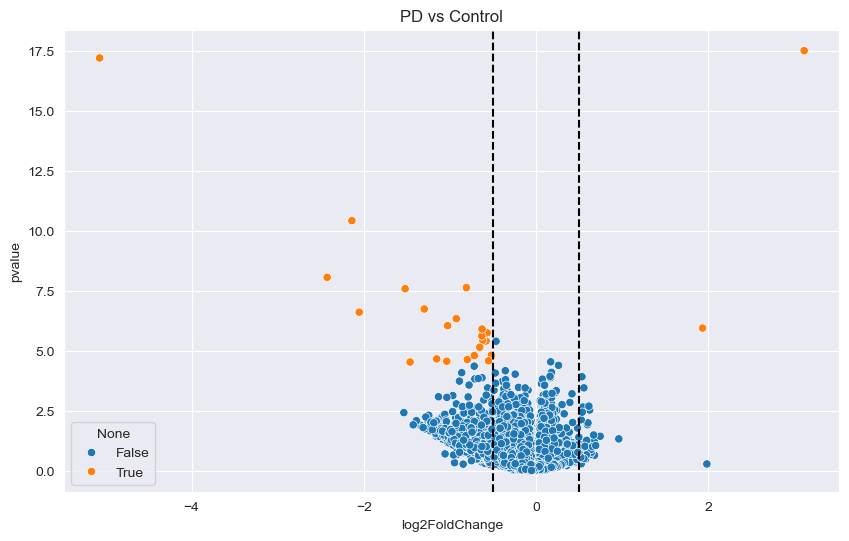

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
sns.scatterplot(x=deg_results['log2FoldChange'],
                y=-np.log10(deg_results['pvalue']),
                hue=((deg_results['padj'] < 0.05) & (deg_results['abs_log2FoldChange'] > 0.5)))
plt.axvline(-0.5, color='k', linestyle='--')
plt.axvline(0.5, color='k', linestyle='--')
plt.title("PD vs Control")
plt.show()

In [63]:
len(adata.layers['gene_symbols'])

378

In [144]:
sign_genes = adata.varm['symbol_ensembl_mapping'].loc[deg_results_sign.index,:][['gene_symbol']]

In [145]:
sign_genes

,gene_symbol
ENSG00000228549.3,LINC03126
ENSG00000207005.1,RNU1-2
ENSG00000239710.3,RN7SL692P
ENSG00000123689.5,G0S2
ENSG00000276281.1,RN7SL126P
ENSG00000265078.2,RN7SL664P
ENSG00000269028.3,ENSG00000269028
ENSG00000120738.7,EGR1
ENSG00000241032.3,RN7SL709P
ENSG00000207110.1,RNVU1-32


In [121]:
ppmi_deg_males_control_pd_baselines = ad.AnnData(deg_results)

In [136]:
deg_genes_symbols = adata.varm['symbol_ensembl_mapping'].loc[deg_results.index]
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping'] = deg_genes_symbols.reindex(ppmi_deg_males_control_pd_baselines.var_names)

In [139]:
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['gene_symbol'] = ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['gene_symbol'].astype(str)
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['trunc_eid'] = ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['trunc_eid'].astype(str)
ppmi_deg_males_control_pd_baselines.write_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_deg_males_control_pd_baselines.h5ad")